## autoscan and detect com port

In [1]:
import numpy as np

import warnings
import serial
import serial.tools.list_ports

# close if any open session already going on
try:
    if ser.isOpen():
        ser.close()
except:
    pass

com_ports = [
    p.device
    for p in serial.tools.list_ports.comports()
    if 'CH340' in p.description  
]
if not com_ports:
    raise IOError("No CH340 found")
if len(com_ports) > 1:
    warnings.warn('Multiple CH340 found - using the first')

ser = serial.Serial(com_ports[0], 115200, timeout=1)
print(ser)

Serial<id=0x1c925adcf48, open=True>(port='COM5', baudrate=115200, bytesize=8, parity='N', stopbits=1, timeout=1, xonxoff=False, rtscts=False, dsrdtr=False)


In [2]:
ports = list(serial.tools.list_ports.comports())
for p in ports:
    print (p)

COM5 - USB-SERIAL CH340 (COM5)


### read data in default configuration
rtcDate,rtcTime,aX,aY,aZ,gX,gY,gZ,mX,mY,mZ,imu_degC,output_Hz,

In [3]:
ser.flushInput()


for i in range(10):
    try:
        raw_data=str(ser.readline().decode("utf-8")).split(",")
        print(raw_data)
        #rtcDate,rtcTime,aX,aY,aZ,gX,gY,gZ,mX,mY,mZ,imu_degC,output_Hz,
        raw_data = [float(i) for i in raw_data[2:-3]]
        if len(raw_data)!=9:  # make sure the data frame is complete/valid
#             print("....")
            continue
        print(raw_data)
    except:
        print("Keyboard Interrupt or RESET")
        pass
# ser.close()

['SD card offline\r\n']
['Datalogging offline\r\n']
['Serial logging offline\r\n']
['IMU online\r\n']
['Identifying Qwiic Muxes...\r\n']
['Identifying Qwiic Devices...\r\n']
['No Qwiic devices detected\r\n']
['rtcDate', 'rtcTime', 'Q6_1', 'Q6_2', 'Q6_3', 'output_Hz', '\r\n']
Keyboard Interrupt or RESET
['01/01/2000', '01:43:22.96', '-0.00042', '0.00017', '0.00007', '142.857', '\r\n']
['01/01/2000', '01:43:23.06', '-0.00070', '0.00038', '0.00013', '18.692', '\r\n']


## filtering
https://stackoverflow.com/questions/40423611/trying-to-use-madgwickahrs-python-script-but-cant-retrieve-the-new-calculated

sensor units | library units
--- | ---
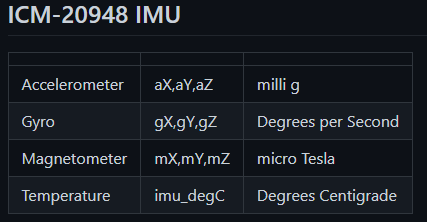 | 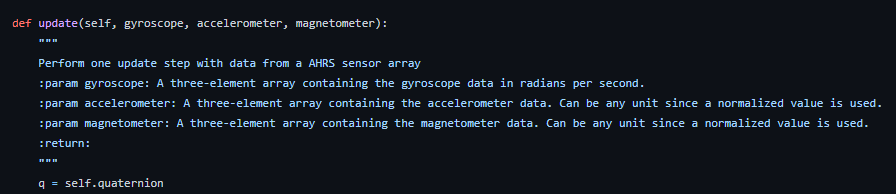


In [4]:
         #aX,      aY,     aZ,      gX,   gY,   gZ,    mX,    mY,   mZ, imu_degC,output_Hz,
data = [-19.53, -17.09, -1003.42, 1.77, -1.47, 2.38, -58.05, 87.0, -40.5, 25.87, 10.294]


In [5]:
# gyr = np.array( data[3:6])
# acc = np.array( data[0:3]) #unit doesnt matter
# mag = np.array( data[6:9]) #unit doesnt matter
# fs = np.array( data[-1] )  #sampling frequency
# gyr_rad = gyr * (np.pi/180)

gyr = np.array( [1.6, 0.6, 1.5])
acc = np.array( [1.2, 1.9, 1.3])
mag = np.array( [2.1, 1.3, 2.1])
gyr_rad = gyr * (np.pi/180)

### source
https://github.com/niru-5/imusensor

In [6]:
import os
import sys
import time


from imusensor.filters import madgwick

sensorfusion = madgwick.Madgwick(0.5)



# imu.caliberateGyro()
# imu.caliberateAccelerometer()
# or load your own caliberation file
#imu.loadCalibDataFromFile("/home/pi/calib_real4.json")

currTime = time.time()
print_count = 0

In [ ]:
ser.flushInput()


for i in range(1000):
    try:
        raw_data=str(ser.readline().decode("utf-8")).split(",")
        #extract variables as float
        raw_data = [float(i) for i in raw_data[2:-3]]
        
        if len(raw_data)!=9:  # make sure the data frame is complete/valid
#             print("....")
            continue
#         print(i," : ",raw_data)
        gyr = np.array( raw_data[:3])
        acc = np.array( raw_data[3:6]) #unit doesnt matter
        mag = np.array( raw_data[6:9]) #unit doesnt matter
        gyr_rad = gyr * (np.pi/180)
        
        for i in range(10):
            newTime = time.time()
            dt = newTime - currTime
            currTime = newTime

            sensorfusion.updateRollPitchYaw(acc[0], acc[1], acc[2], 
                                            gyr_rad[0], gyr_rad[1], gyr_rad[2], 
                                            mag[0], mag[1], mag[2], dt)

        if print_count == 2:
            print ("{0:.2f}, {1:.2f}, {2:.2f}".format(sensorfusion.roll, sensorfusion.pitch, sensorfusion.yaw))
            print_count = 0

        print_count = print_count + 1
#         time.sleep(0.01)
        
        
    except Exception as e:
#         print(e)
#         print("Keyboard Interrupt or RESET")
        pass
##########################


In [7]:
import math
 
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return math.degrees(roll_x), math.degrees(pitch_y), math.degrees(yaw_z) # in degrees

### read data in quart9
rtcDate,rtcTime,  Q9_1(x),Q9_2(y),Q9_3(z),  HeadAcc,output_Hz,

q0 = sqrt(1.0 - ((q1 * q1) + (q2 * q2) + (q3 * q3))) ## w

In [ ]:
# ser.flushInput()


# for i in range(5000):
#     try:
#         raw_data=str(ser.readline().decode("utf-8")).split(",")
# #         print(raw_data)
#         #rtcDate,rtcTime,Q9_1(x),Q9_2(y),Q9_3(z),HeadAcc,output_Hz,
#         raw_data = [float(i) for i in raw_data[2:-2]]
# #         print(raw_data)
#         if len(raw_data)!=4:  # make sure the data frame is complete/valid
# #             print("....")
#             continue
# #         print(raw_data)
#         q1 = raw_data[0]
#         q2 = raw_data[1]
#         q3 = raw_data[2]
#         w = math.sqrt(1.0 - ((q1 * q1) + (q2 * q2) + (q3 * q3)))
#         r, p, y = euler_from_quaternion(q1, q2, q3, w)
#         print("{0:.2f}, {1:.2f}, {2:.2f}".format(r,p,y))
#     except:
#         print("Keyboard Interrupt or RESET")
#         pass
# # ser.close()

### read data in quart6
rtcDate,rtcTime,   Q6_1,Q6_2,Q6_3,   output_Hz,

q0 = sqrt(1.0 - ((q1 * q1) + (q2 * q2) + (q3 * q3))) ## w

In [11]:
ser.flushInput()


for i in range(5000):
    try:
        raw_data=str(ser.readline().decode("utf-8")).split(",")
#         print(raw_data)
        
        raw_data = [float(i) for i in raw_data[2:-2]]
#         print(raw_data)
        if len(raw_data)!=3:  # make sure the data frame is complete/valid
#             print("....")
            continue
#         print(raw_data)
        q1 = raw_data[0]
        q2 = raw_data[1]
        q3 = raw_data[2]
        w = math.sqrt(1.0 - ((q1 * q1) + (q2 * q2) + (q3 * q3)))
        r, p, y = euler_from_quaternion(q1, q2, q3, w)
        print("{0:.2f}, {1:.2f}, {2:.2f}".format(r,p,y))
    except:
        print("Keyboard Interrupt or RESET")
        pass
# ser.close()

-176.57, 0.48, -46.28
-176.57, 0.49, -46.28
-176.57, 0.49, -46.29
-176.57, 0.49, -46.29
-176.55, 0.50, -46.28
-176.55, 0.50, -46.28
-176.55, 0.50, -46.28
-176.56, 0.50, -46.28
-176.59, 0.48, -46.27
-176.57, 0.48, -46.27
-176.58, 0.47, -46.27
-176.58, 0.48, -46.27
-176.58, 0.47, -46.26
-176.59, 0.47, -46.26
-176.60, 0.46, -46.25
-176.58, 0.47, -46.25
-176.58, 0.47, -46.25
-176.61, 0.46, -46.26
-176.62, 0.46, -46.26
-176.62, 0.46, -46.26
-176.62, 0.46, -46.26
-176.62, 0.46, -46.26
-176.60, 0.48, -46.26
-176.59, 0.48, -46.28
-176.59, 0.48, -46.28
-176.59, 0.48, -46.28
-176.59, 0.48, -46.28
-176.59, 0.48, -46.28
-176.62, 0.47, -46.28
-176.59, 0.49, -46.28
-176.59, 0.49, -46.28
-176.59, 0.49, -46.28
-176.60, 0.48, -46.29
-176.60, 0.48, -46.29
-176.62, 0.47, -46.29
-176.59, 0.48, -46.29
-176.59, 0.48, -46.29
-176.63, 0.47, -46.29
-176.64, 0.47, -46.29
-176.64, 0.48, -46.29
-176.62, 0.48, -46.29
-176.61, 0.48, -46.29
-176.61, 0.47, -46.29
-176.61, 0.47, -46.29
-176.64, 0.46, -46.29
-176.64, 0

Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt o

Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt o

Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt or RESET
Keyboard Interrupt o